# Classification of handwritten digits from MNIST database using different clustering algorithms

## Introduction

Clustering, a fundamental technique in unsupervised learning, is employed to identify inherent subgroups within data when labels are absent. Unlike classification tasks where outcomes are known, clustering explores patterns and relationships autonomously. This project delves into the application of clustering algorithms to autonomously classify handwritten digits from the widely used MNIST database, a repository of 28x28 pixel images.

In [1]:
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids, CLARA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
colors=['#00FFFF','#0000FF','#FFD700','#FF4500','#FF0000','#15B01A','#DA70D6','#FFFF14','#3D1C02','#D1B26F']

**MNIST Database:**

The MNIST database, a repository of handwritten digits, plays a pivotal role in training image processing and machine learning systems. Comprising 60,000 training images, each digit is represented as a 28x28 pixel image, with pixel values ranging from 0 to 255. This project focuses on utilizing this dataset for exploring the effectiveness of clustering algorithms in classifying handwritten digits.

What does data look like?

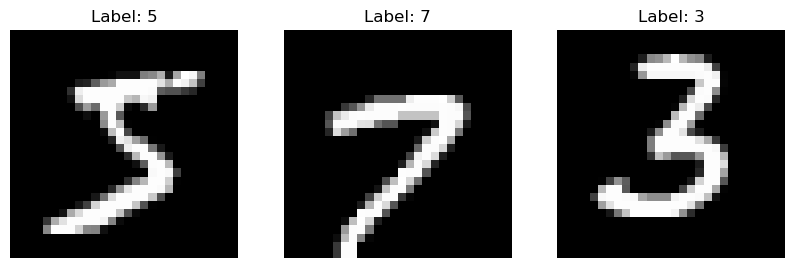

In [2]:
indices_to_plot = [0, 123, 52375]

# Plot the selected digits
plt.figure(figsize=(10, 5))
for i, index in enumerate(indices_to_plot, 1):
    plt.subplot(1, len(indices_to_plot), i)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Label: {train_labels[index]}")
    plt.axis('off')

plt.show()

In [3]:
train_images_flat = train_images.reshape((train_images.shape[0], -1))

# Create Pandas DataFrames for training and testing
columns = [f'pixel_{i}' for i in range(train_images_flat.shape[1])]
mnist_df = pd.DataFrame(train_images_flat, columns=columns)

# Add labels to the DataFrames
mnist_df['label'] = train_labels
mnist_clustering_data = mnist_df.drop(columns=['label'])

In [4]:
pca = PCA(n_components=10)
reduced_features = pca.fit_transform(mnist_clustering_data)

# Add reduced features to the DataFrame
mnist_df['PCA1'] = reduced_features[:, 0]
mnist_df['PCA2'] = reduced_features[:, 1]

## Clustering algorithms

**KMeans:**

KMeans is a centroid-based clustering algorithm widely used for partitioning a dataset into K distinct, non-overlapping subgroups or clusters. The algorithm iteratively refines the position of cluster centroids until convergence. The core steps involve assigning each data point to the nearest centroid based on Euclidean distance and updating the centroids based on the mean of the data points assigned to each cluster. KMeans is efficient, scalable, and relatively straightforward to implement. It works well when clusters are globular and equally sized, making it suitable for a variety of applications, including image segmentation and customer segmentation.

**KMedoids (PAM - Partitioning Around Medoids):**

KMedoids, or Partitioning Around Medoids, is an extension of KMeans that addresses its sensitivity to outliers. Instead of using centroids, KMedoids employs actual data points, called medoids, as representatives of clusters. The algorithm aims to minimize the sum of dissimilarities between data points and their corresponding medoids within a cluster. By using medoids, KMedoids becomes robust in the presence of outliers and noise. This makes it suitable for situations where the mean (used in KMeans) may be influenced by extreme values. KMedoids finds applications in diverse fields, including biology, medicine, and image analysis.

**CLARA (Clustering Large Applications):**

CLARA is a clustering algorithm designed to handle large datasets efficiently. It addresses the computational challenges of traditional clustering algorithms when applied to sizable datasets by adopting a sampling approach. CLARA randomly selects multiple samples from the dataset, applies a clustering algorithm (such as PAM) to each sample, and then combines the results. This process enhances the scalability of clustering algorithms to large datasets without compromising accuracy. CLARA is particularly useful in situations where processing the entire dataset is impractical due to computational constraints. It provides a balance between accuracy and computational efficiency, making it suitable for large-scale clustering applications in various domains, such as marketing and bioinformatics.

**Agglomerative Hierarchical Clustering:**

Agglomerative Hierarchical Clustering is an unsupervised clustering algorithm that builds a hierarchy of clusters by iteratively merging or agglomerating individual data points or existing clusters. It starts with each data point considered as a separate cluster and progressively combines the most similar clusters until a single cluster containing all data points is formed. This hierarchical structure is often represented as a tree-like diagram called a dendrogram.

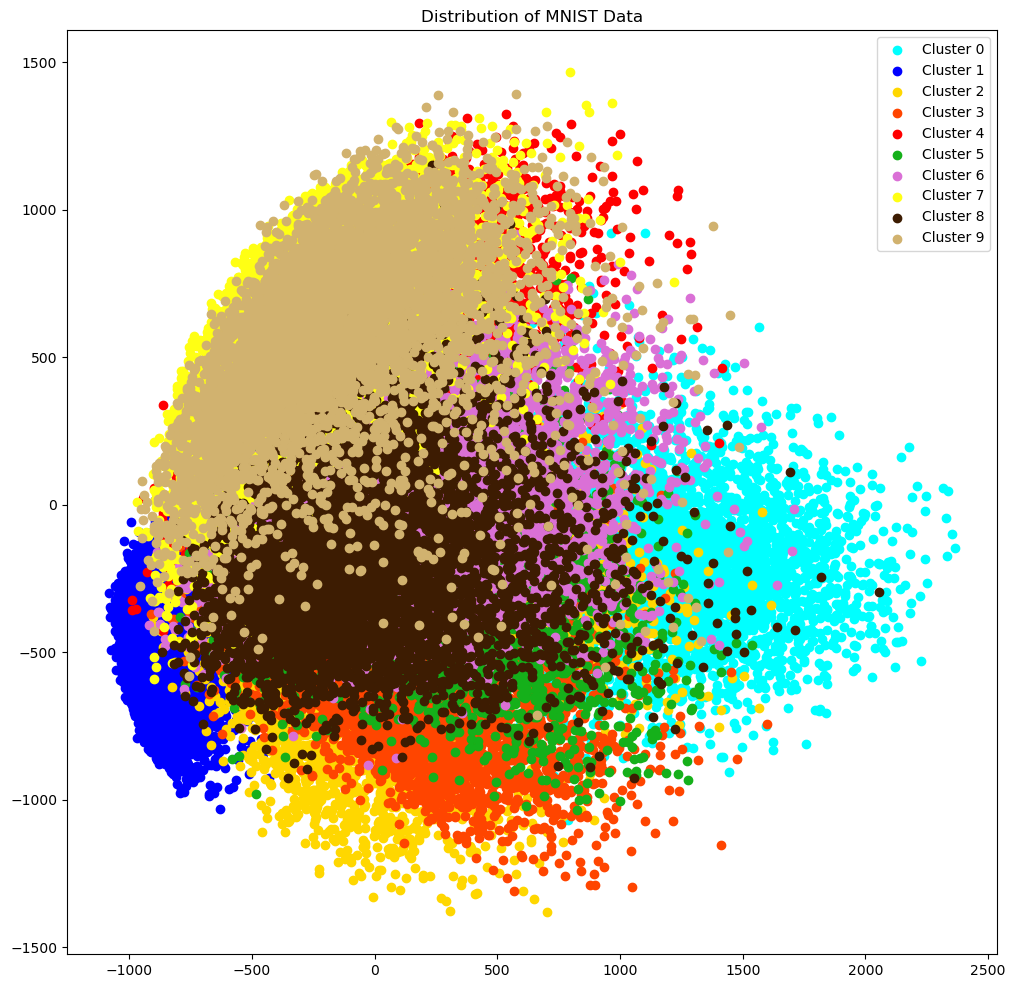

In [5]:
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = mnist_df[mnist_df['label'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}',c=color)
plt.title('Distribution of MNIST Data')
plt.legend()
plt.show()

This is a normal distribution of data with 784 (28x28) dimensions. We can see it is hard to determine how to seperate one digit from another. Now lets see how 4 different clustering algorithms will perform with this kind of database.

**K-Means**

In [30]:
KM = KMeans(n_clusters=10)
mnist_df['cluster_km'] = KM.fit_predict(mnist_clustering_data)

c:\Users\jsmig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**K-Medoids**

In [33]:
PAM = KMedoids(n_clusters=10)
mnist_df['cluster_pam'] = PAM.fit_predict(mnist_clustering_data)

**CLARA**

In [8]:
CLARA = CLARA(n_clusters=10)
mnist_df['cluster_clara'] = CLARA.fit_predict(mnist_clustering_data)

**Agglomerative Hierarchial Clustering**

In [9]:
AHC = AgglomerativeClustering(n_clusters=10)
mnist_df['cluster_ahc'] = AHC.fit_predict(mnist_clustering_data)

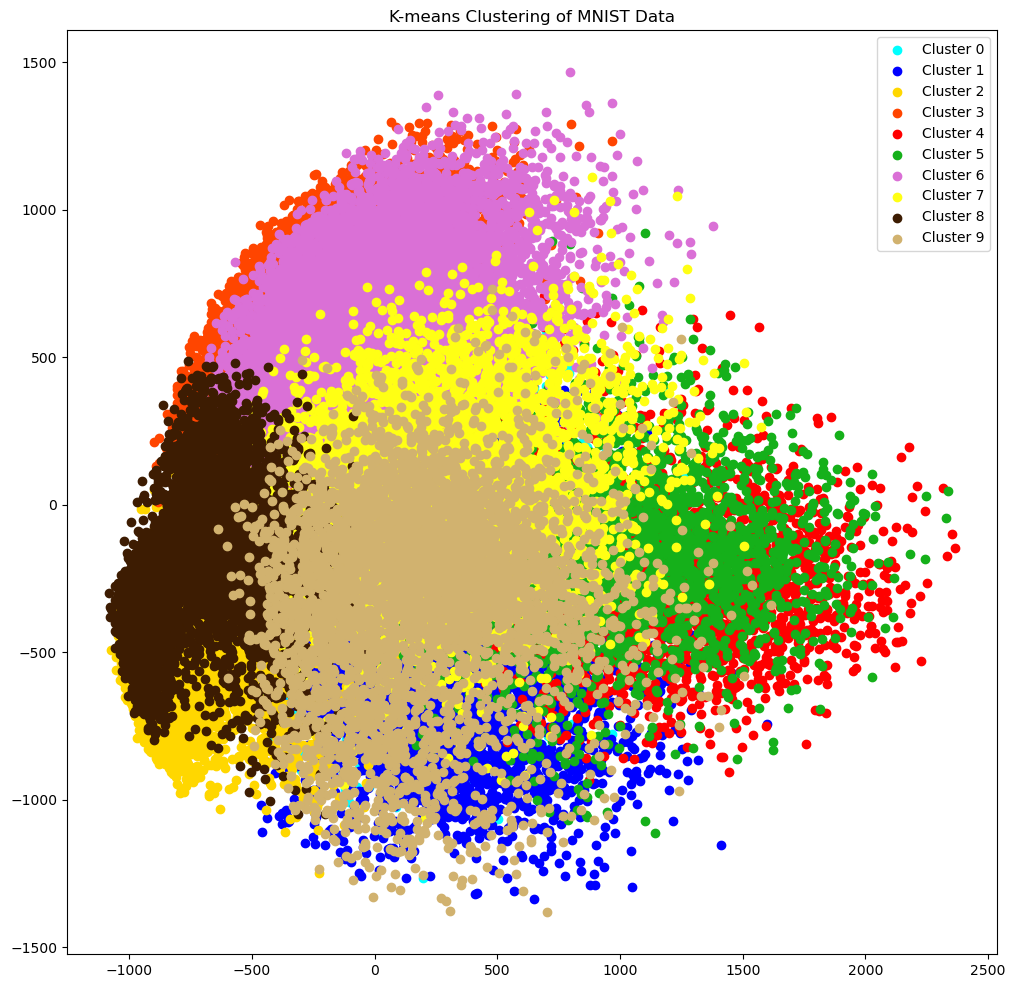

In [10]:
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = mnist_df[mnist_df['cluster_km'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}',c=color)
plt.title('K-means Clustering of MNIST Data')
plt.legend()
plt.show()

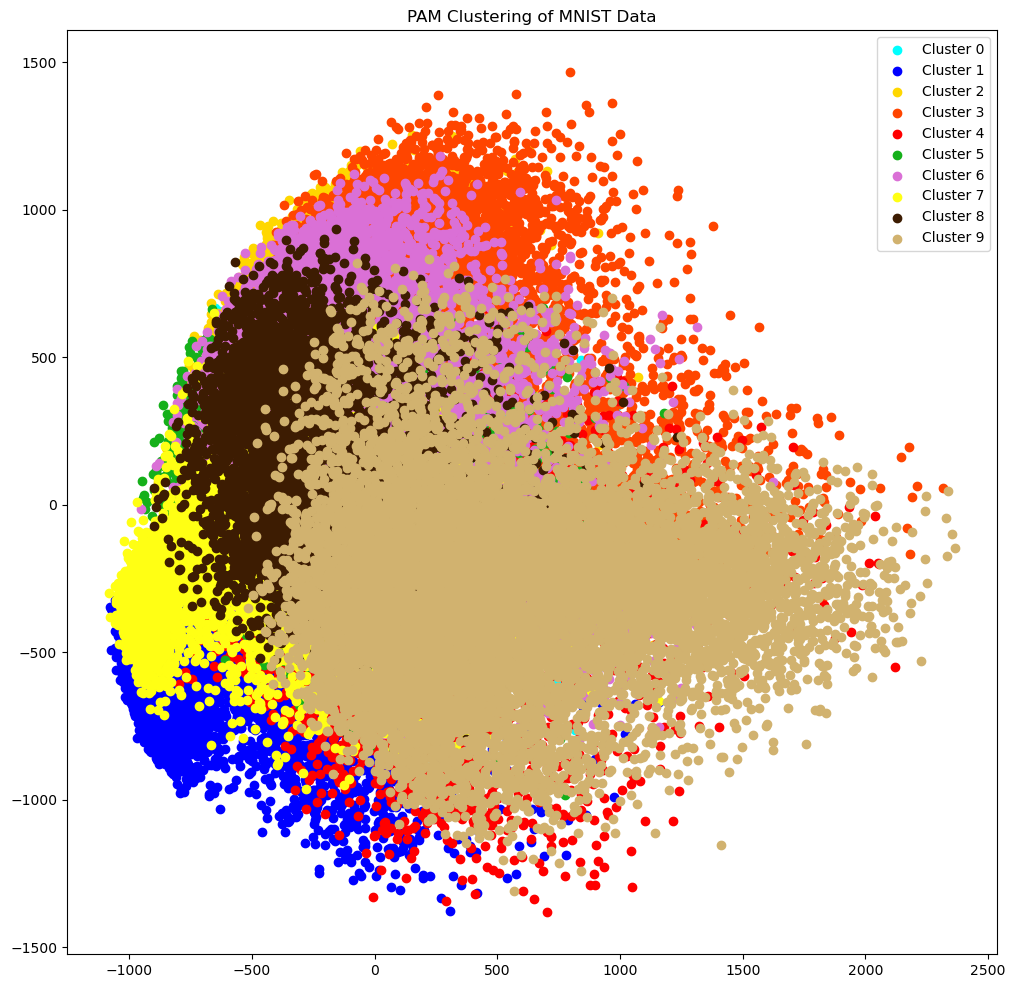

In [11]:
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = mnist_df[mnist_df['cluster_pam'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}',c=color)
plt.title('PAM Clustering of MNIST Data')
plt.legend()
plt.show()

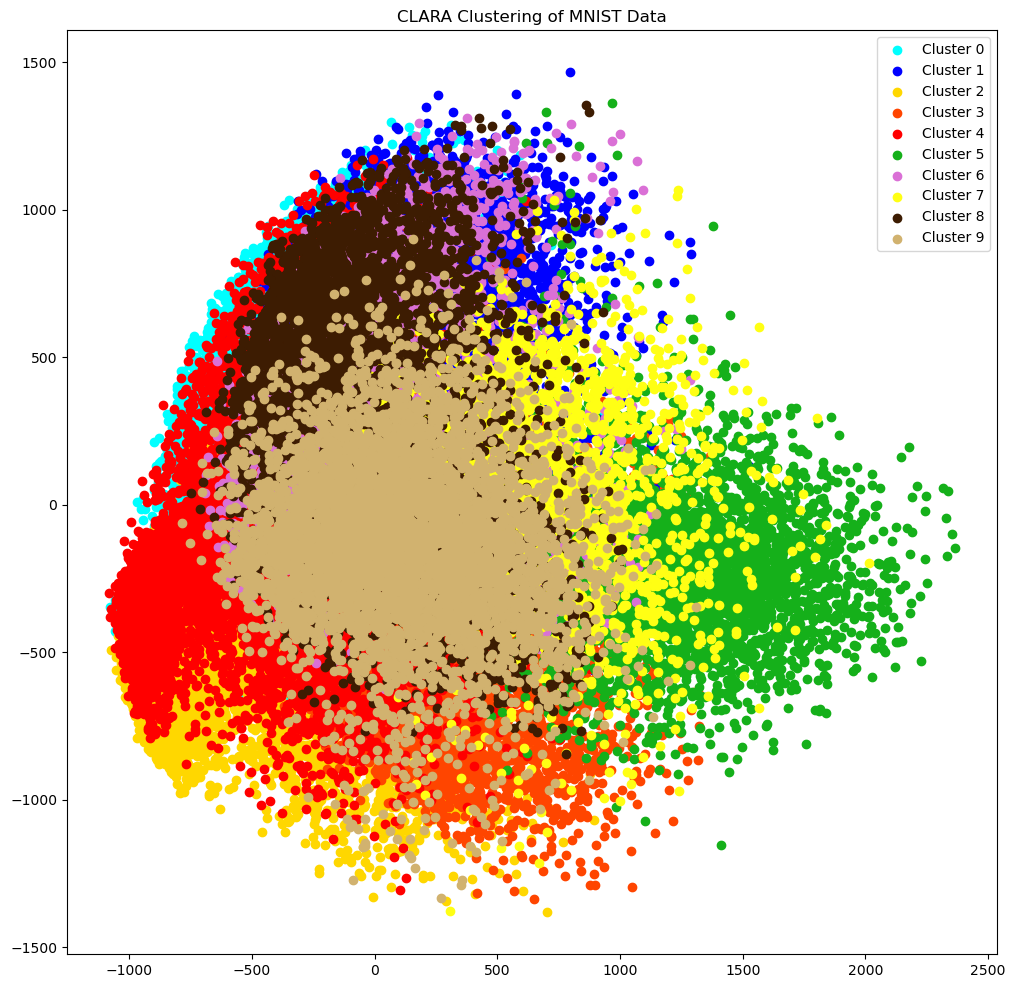

In [12]:
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = mnist_df[mnist_df['cluster_clara'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}',c=color)
plt.title('CLARA Clustering of MNIST Data')
plt.legend()
plt.show()

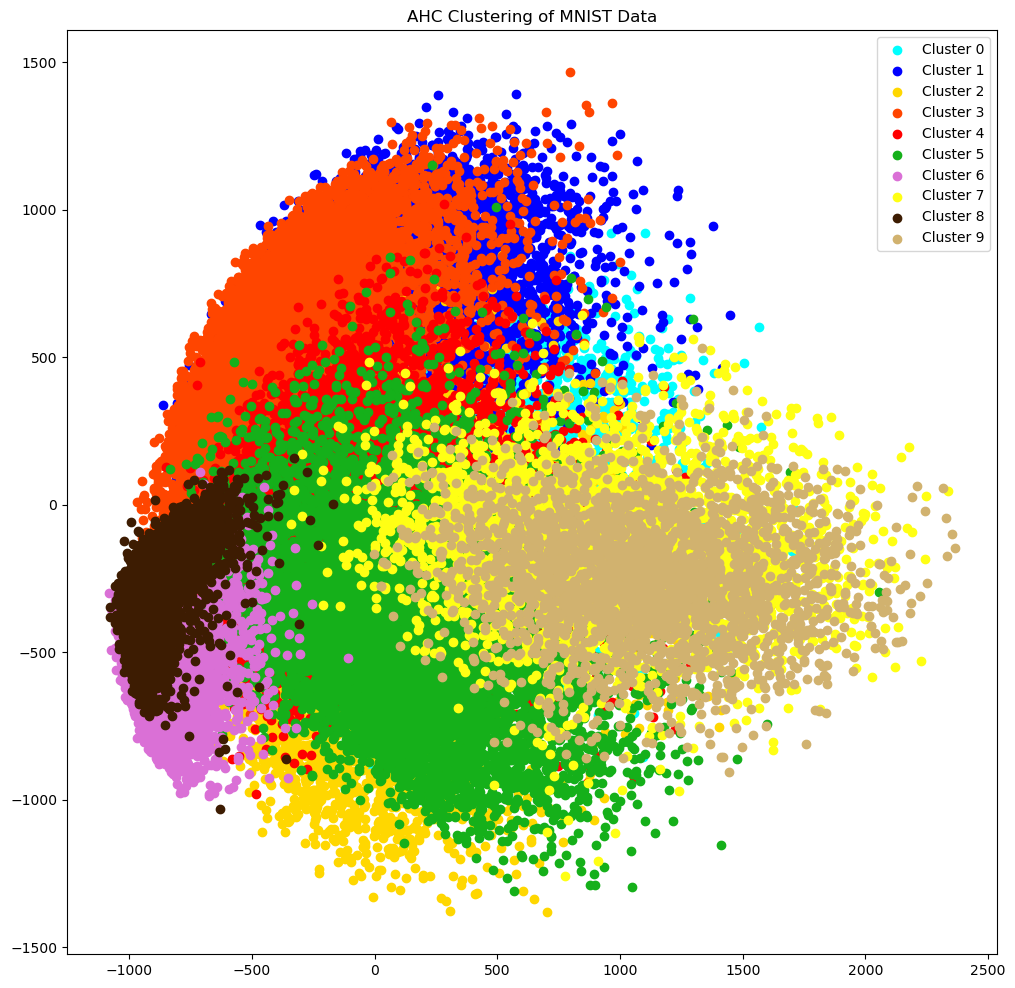

In [13]:
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = mnist_df[mnist_df['cluster_ahc'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}',c=color)
plt.title('AHC Clustering of MNIST Data')
plt.legend()
plt.show()

## Checking clustering quality and performance

**Silhouette Score:**

The silhouette score is a metric used to evaluate the performance of clustering algorithms by measuring the separation and compactness of clusters in a dataset. It provides a numerical indication of how well-defined the clusters are. The silhouette score ranges from -1 to 1, where:

A score close to +1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.

A score around 0 indicates overlapping clusters with data points on the decision boundary between clusters.

A score close to -1 indicates that the data point is possibly assigned to the wrong cluster.

The silhouette score is calculated for each data point and then averaged across all data points in the dataset. It is a valuable tool for selecting the optimal number of clusters in algorithms like KMeans, where higher silhouette scores suggest better-defined clusters.

**Calinski-Harabasz Index:**

The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is another metric used for evaluating the quality of clustering in a dataset. Like the silhouette score, it assists in determining the optimal number of clusters for a given algorithm. The index is calculated using both the variance within clusters and the variance between clusters.

A higher Calinski-Harabasz Index suggests better-defined, well-separated clusters. It is sensitive to both the compactness and separation of clusters, making it a useful metric for assessing the effectiveness of clustering algorithms.

In summary, both the silhouette score and the Calinski-Harabasz Index play crucial roles in evaluating the performance of clustering algorithms. The silhouette score focuses on individual data points, while the Calinski-Harabasz Index considers the overall structure of clusters in the dataset. Together, they contribute to a comprehensive understanding of clustering quality.

**Silhouette scores for used clustering algorithms**

In [16]:
silhouette_km = silhouette_score(mnist_clustering_data, mnist_df['cluster_km'])
silhouette_pam = silhouette_score(mnist_clustering_data, mnist_df['cluster_pam'])
silhouette_clara = silhouette_score(mnist_clustering_data, mnist_df['cluster_clara'])
silhouette_ahc = silhouette_score(mnist_clustering_data, mnist_df['cluster_ahc'])
print(f'KMeans : {silhouette_km}  PAM : {silhouette_pam}  CLARA : {silhouette_clara}  AHC : {silhouette_ahc} ')

KMeans : 0.058464219932315716  PAM : 0.014143669794226578  CLARA : 0.04439429914664396  AHC : 0.02409487273928228 


**Calinski-Harabasz scores for used clustering algorithms**

In [17]:
calinski_harabasz_km = calinski_harabasz_score(mnist_clustering_data, mnist_df['cluster_km'])
calinski_harabasz_pam = calinski_harabasz_score(mnist_clustering_data, mnist_df['cluster_pam'])
calinski_harabasz_clara = calinski_harabasz_score(mnist_clustering_data, mnist_df['cluster_clara'])
calinski_harabasz_ahc = calinski_harabasz_score(mnist_clustering_data, mnist_df['cluster_ahc'])
print(f'KMeans : {calinski_harabasz_km}  PAM : {calinski_harabasz_pam}  CLARA : {calinski_harabasz_clara}  AHC : {calinski_harabasz_ahc} ')

KMeans : 2296.6436678305986  PAM : 1244.3573200685182  CLARA : 1668.0858253802462  AHC : 1898.0822553566597 


As we can see the silhouette and calinski harabasz scores performed very poorly. This means that classification of MNIST database (in form of 784 dimensional array) is a not a good solution.

## Representation of cluster centroids:

Now I want to show how each's cluster centroid looks like for K-Means and K-Medoids to check if each cluster has a different image of a number assinged to it.

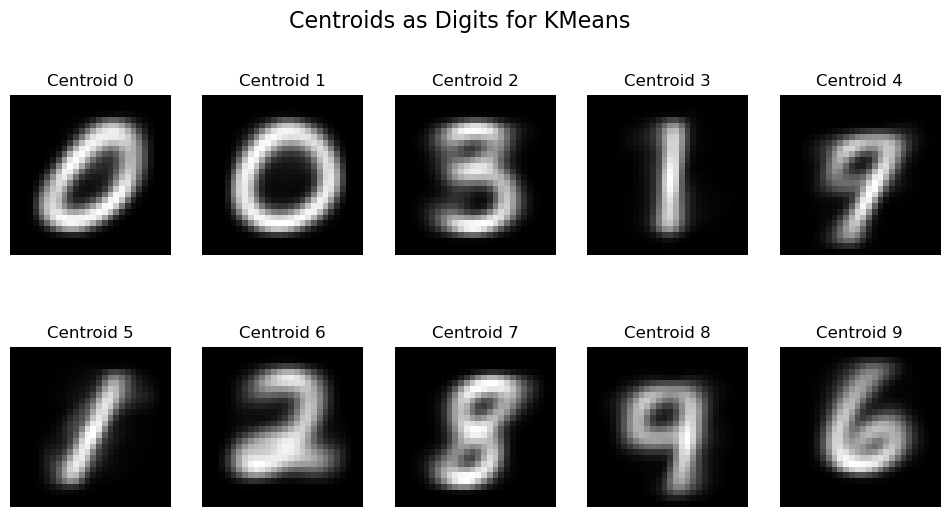

In [31]:
centroids=KM.cluster_centers_
centroid_images = centroids.reshape((10, 28, 28))

# Visualize the centroids as digits
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_images[i], cmap='gray')
    plt.title(f'Centroid {i}')
    plt.axis('off')

plt.suptitle('Centroids as Digits for KMeans', fontsize=16)
plt.show()

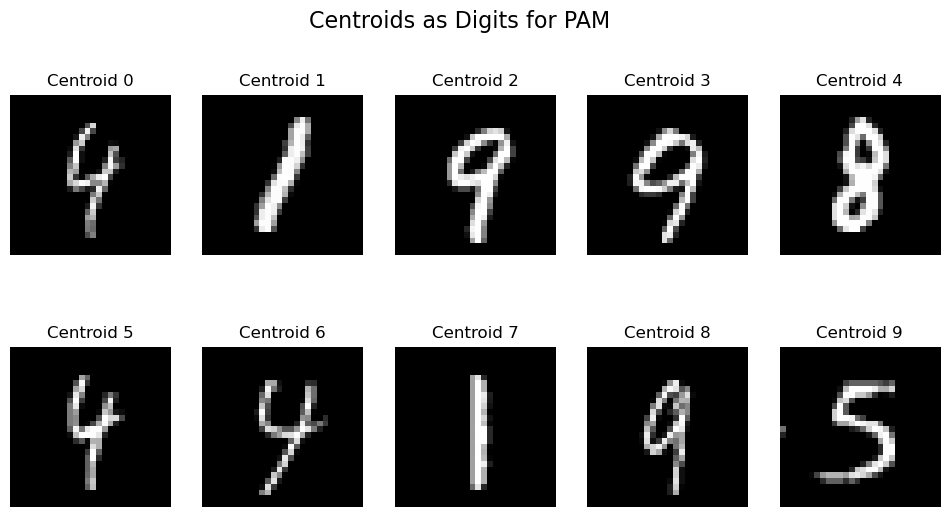

In [34]:
centroids1=PAM.cluster_centers_
centroid_images1 = centroids1.reshape((10, 28, 28))

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_images1[i], cmap='gray')
    plt.title(f'Centroid {i}')
    plt.axis('off')

plt.suptitle('Centroids as Digits for PAM', fontsize=16)
plt.show()

What we can take away from centroids is that clustering algorithms did not perform well. When we add the silhouette and calinski-harabasz scores we can definitely say that we are not satisfied with the solution we got. That is why we will perform a dimension reduction on this database using t-SNE.

## Dimension reduction using t-SNE

**t-SNE (t-Distributed Stochastic Neighbor Embedding):**

t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a dimensionality reduction technique commonly used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It is particularly effective in revealing the intrinsic structure and relationships between data points, making it a popular tool for exploratory data analysis and pattern recognition.

In [18]:
tsne = TSNE(n_components = 2)
data_tsne = tsne.fit_transform(mnist_clustering_data)
tsne_mnist = pd.DataFrame(data=data_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_clustering_data = tsne_mnist.copy()
tsne_mnist = tsne_mnist.join(mnist_df['label'])

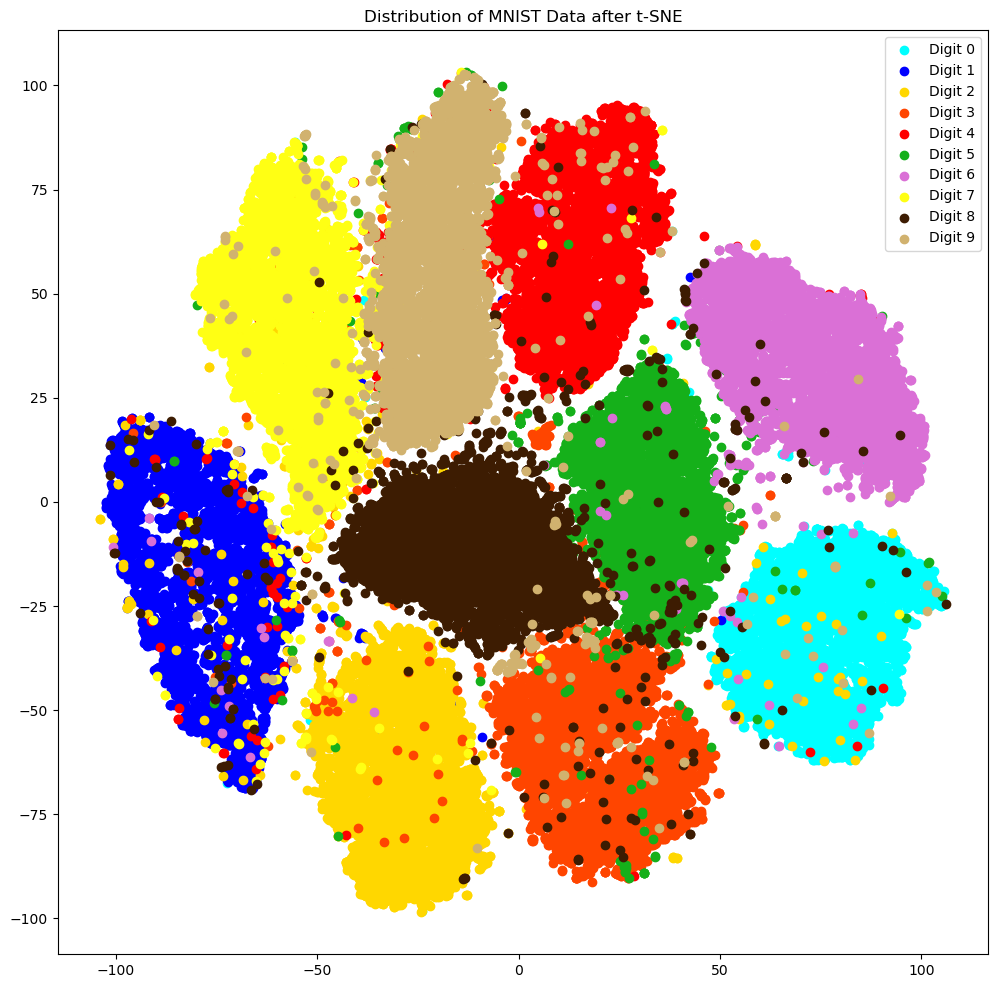

In [19]:
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['label'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Digit {cluster}',c=color)
plt.title('Distribution of MNIST Data after t-SNE')
plt.legend()
plt.show()

This is a distribution of the MNIST database after reducing the dimensions to 2. Now the difference between each digit is much more visible. We can notice some mix-ups, but we do not want to interfere with the data. We can now expect clustering algorithms to perform much better, still not perfectly, but much better.

**K-Means with t-SNE**

c:\Users\jsmig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


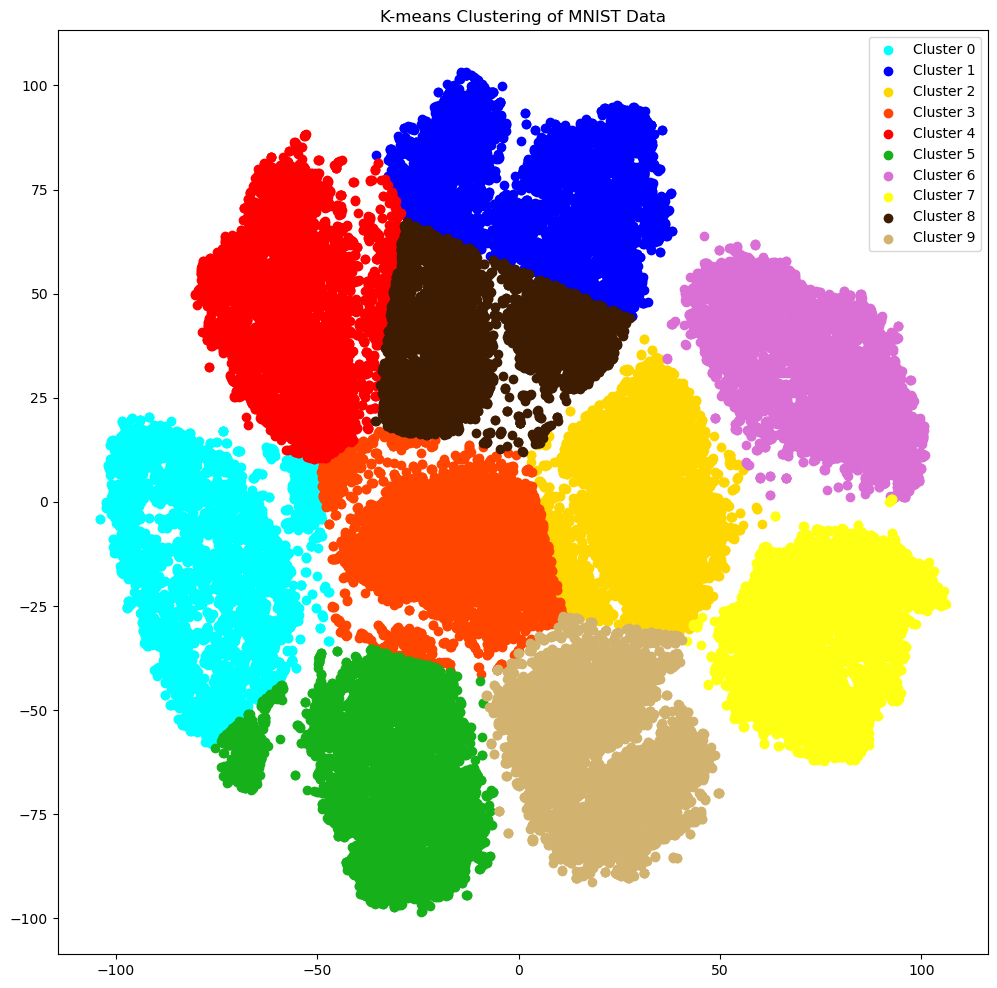

In [20]:
tsne_mnist['cluster_km'] = KM.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_km'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('K-means Clustering of MNIST Data')
plt.legend()
plt.show()

**Silhouette and Calinski-Harabasz scores for K-Means with t-SNE**

In [22]:
silhouette_km_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_km'])
print(f'Silhouette score: {silhouette_km_tsne}')
calinski_harabasz_km_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_km'])
print(f'Calinski-Harabasz score: {calinski_harabasz_km_tsne}')

Silhouette score: 0.4227192997932434
Calinski-Harabasz score: 65266.56569003231


**K-Medoids with t-SNE**

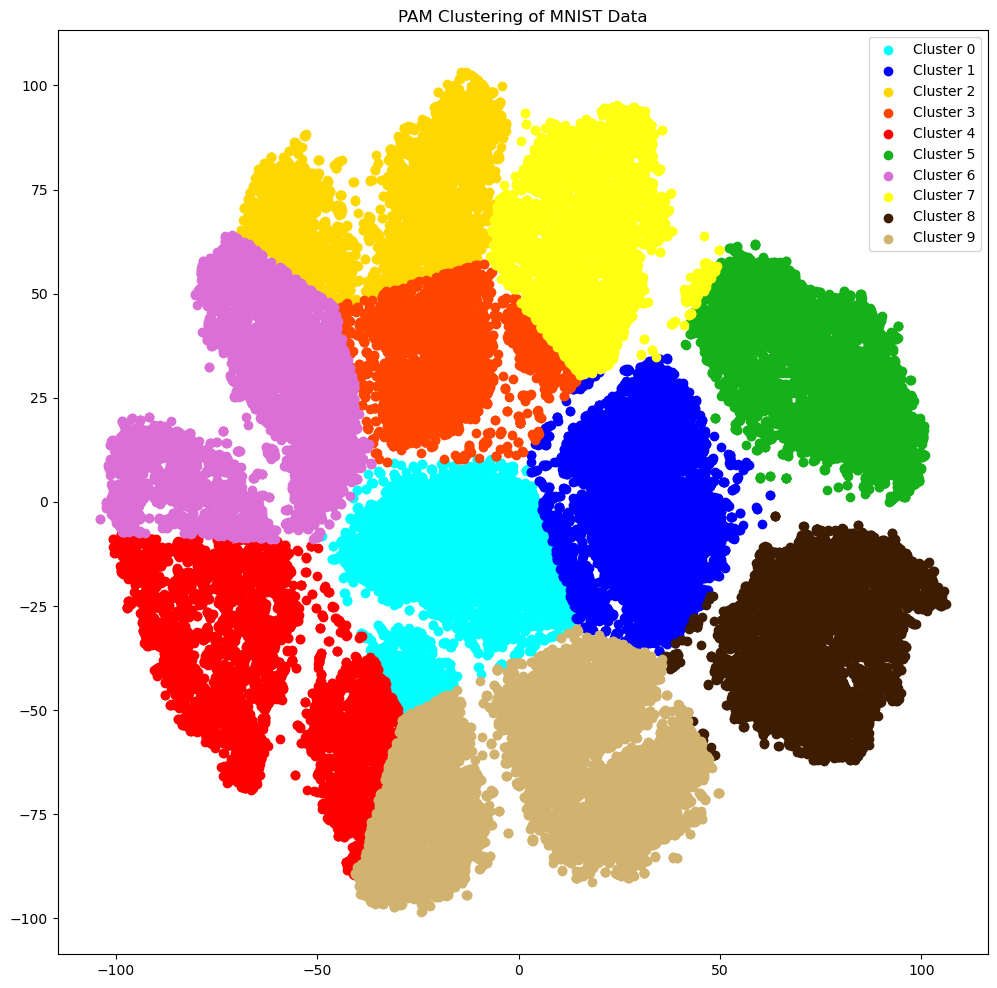

In [23]:
tsne_mnist['cluster_pam'] = PAM.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_pam'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('PAM Clustering of MNIST Data')
plt.legend()
plt.show()

**Silhouette and Calinski-Harabasz scores for K-Medoids with t-SNE**

In [24]:
silhouette_pam_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_pam'])
print(f'Silhouette score: {silhouette_pam_tsne}')
calinski_harabasz_pam_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_pam'])
print(f'Calinski-Harabasz score: {calinski_harabasz_pam_tsne}')

Silhouette score: 0.3852231800556183
Calinski-Harabasz score: 55149.5196870729


**CLARA with t-SNE**

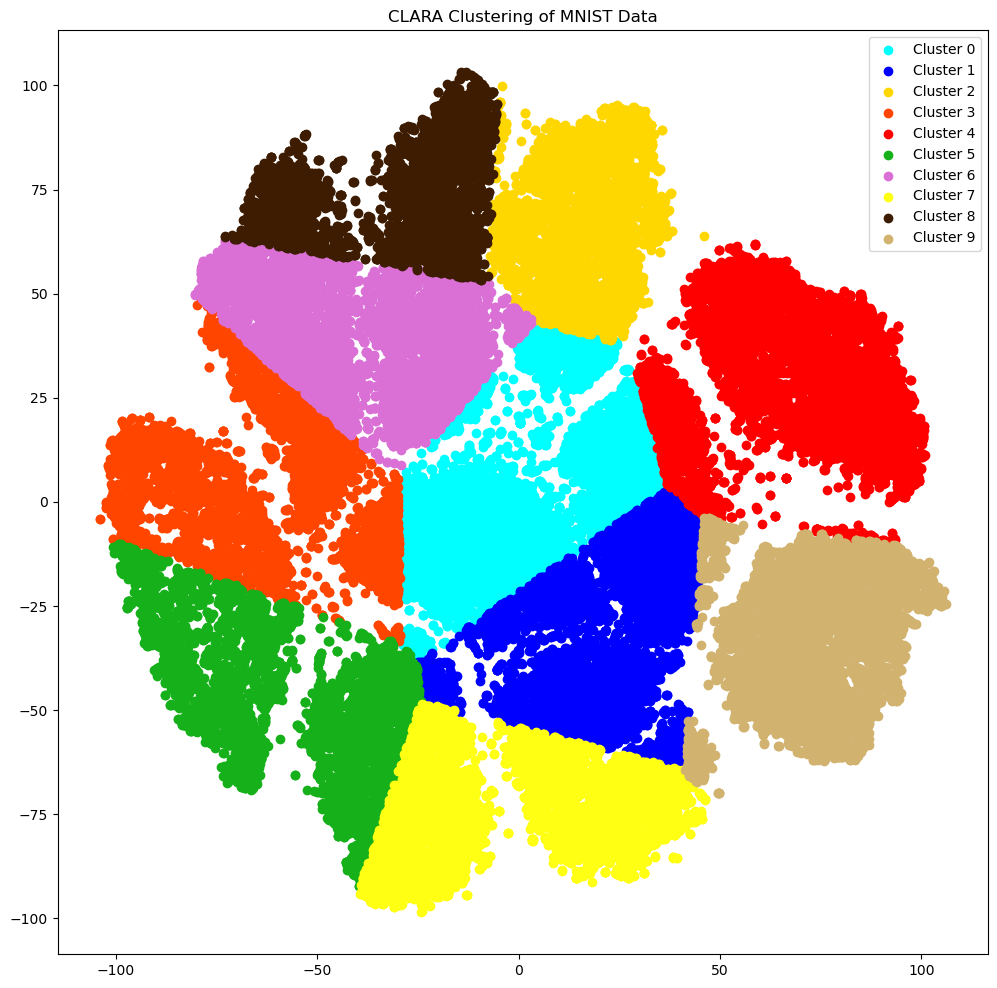

In [25]:
tsne_mnist['cluster_clara'] = CLARA.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_clara'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('CLARA Clustering of MNIST Data')
plt.legend()
plt.show()

**Silhouette and Calinski-Harabasz scores for CLARA with t-SNE**

In [26]:
silhouette_clara_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_clara'])
print(f'Silhouette score: {silhouette_clara_tsne}')
calinski_harabasz_clara_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_clara'])
print(f'Calinski-Harabasz score: {calinski_harabasz_clara_tsne}')

Silhouette score: 0.32581377029418945
Calinski-Harabasz score: 49641.94812634363


**Agglomerative Hierarchial Clustering with t-SNE**

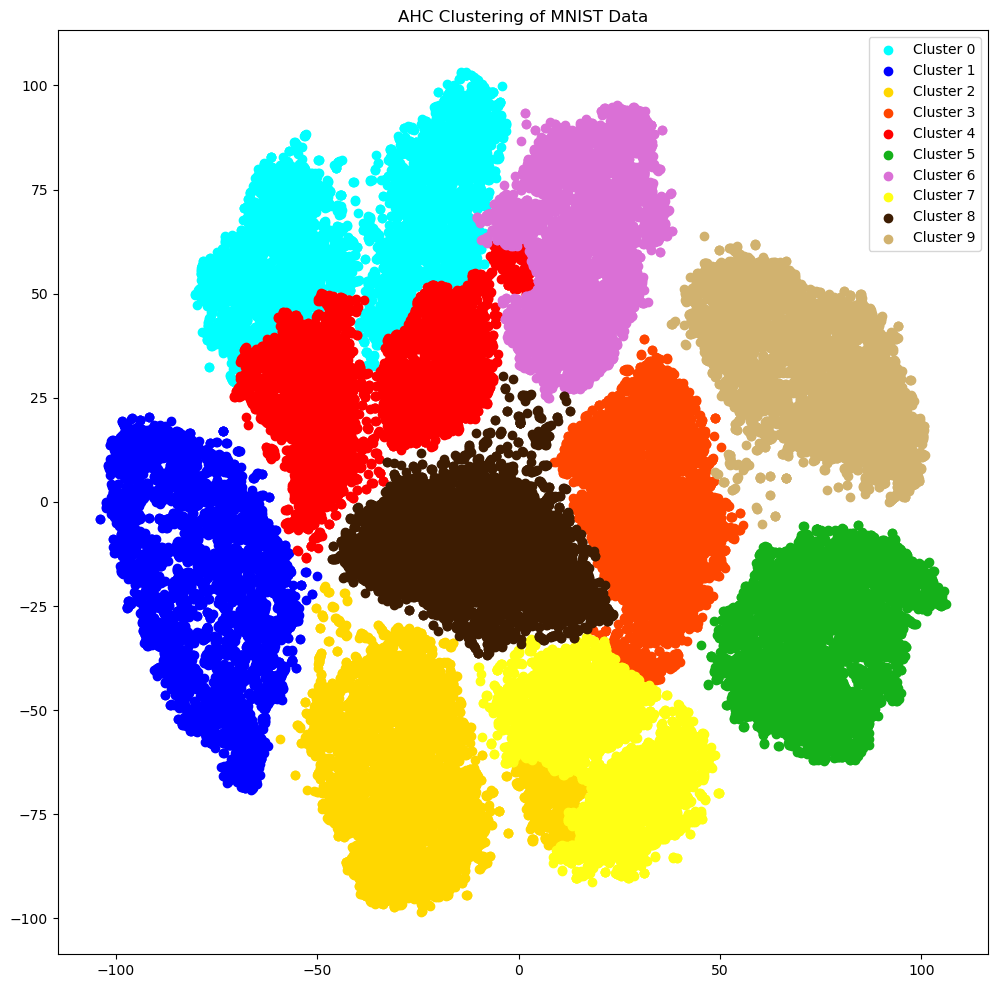

In [27]:
tsne_mnist['cluster_ahc'] = AHC.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_ahc'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('AHC Clustering of MNIST Data')
plt.legend()
plt.show()

**Silhouette and Calinski-Harabasz scores for Agglomerative Hierarchial Clustering with t-SNE**

In [28]:
silhouette_ahc_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_ahc'])
print(f'Silhouette score: {silhouette_ahc_tsne}')
calinski_harabasz_ahc_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_ahc'])
print(f'Calinski-Harabasz score: {calinski_harabasz_ahc_tsne}')

Silhouette score: 0.3896093964576721
Calinski-Harabasz score: 58455.984305983235


By just looking at the plots we can see that algorithms performed much better and silhouette and calinski-harabasz scores confirm that. They are not perfect clustering solutions and JUST clustering should not be used for classification of digits, but we have found a way to correct our solutions to some extent

## Conclusion

After loading the data we applied four different clustering algorithms: K-Means, K-Medoids (PAM), CLARA and Agglomerative Hierarchial Clustering. The results from applying these algorithms were very poor, which was confirmed by the silhouette and calinski-harabasz scores for each algorithm. This was also the conclusion after the analysis of the centroids for K-Means and K-Medoids. To find a better solution we performed a dimension reduction to 2 components using t-SNE. This yielded much better results, they were not perfect and should not be satisyfing when it comes to classification of handwritten digits.